# LetsGrowMore (LGMVIP) - "DATA SCIENCE INTERN"

# LGMVIP-OCT 2022

# TASK 2(Intermediate level)- Prediction using Decision Tree Algorithm :

# By Subhodwip Chatterjee.

# IMPORTING THE REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

# Loading the Dataset

In [2]:
df=pd.read_csv('iris.csv')

# Reading the Dataset

In [4]:
df.head(10)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [6]:
df.shape

(149, 5)

In [10]:
df.columns

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species'], dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  149 non-null    float64
 1   SepalWidth   149 non-null    float64
 2   PetalLength  149 non-null    float64
 3   PetalWidth   149 non-null    float64
 4   Species      149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


# CHECKING MISSING DATA

In [12]:
df.isnull().sum()

SepalLength    0
SepalWidth     0
PetalLength    0
PetalWidth     0
Species        0
dtype: int64

# Describing the Dataset

In [13]:
df.describe()

,SepalLength,SepalWidth,PetalLength,PetalWidth
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# VISUALISATION OF THE DATASET

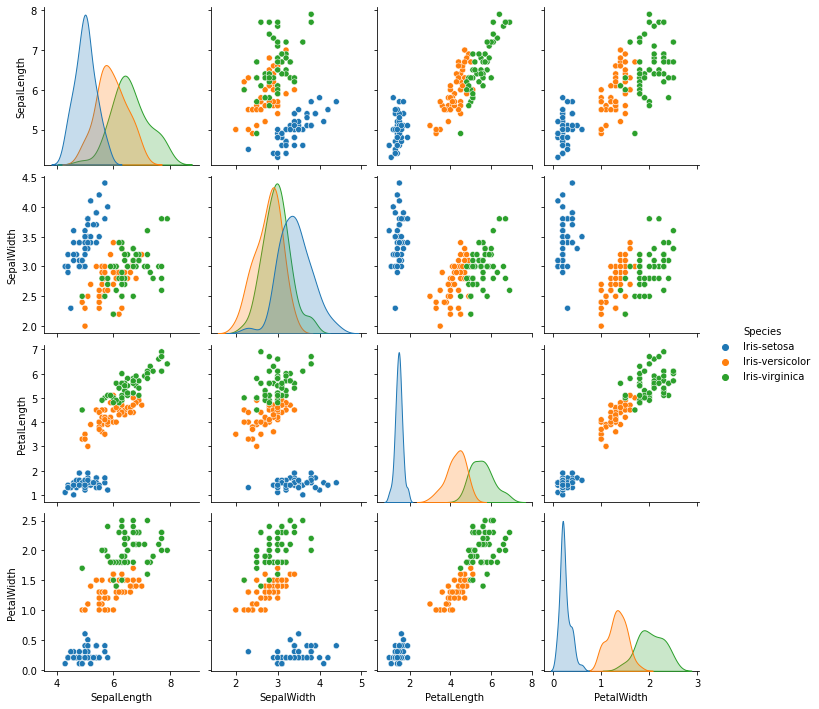

In [14]:
sns.pairplot(df,hue="Species")

<AxesSubplot:ylabel='PetalWidth'>

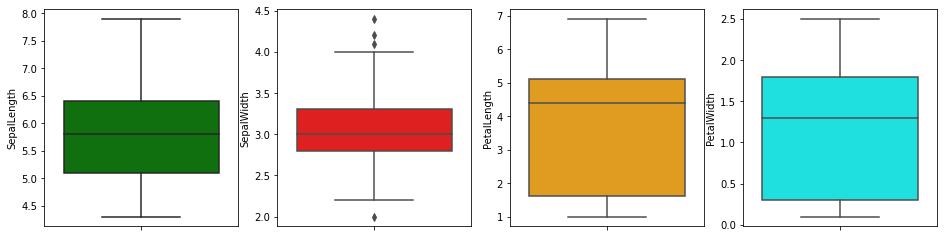

In [17]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLength',color='green')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidth',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalLength',color='orange')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidth',color='cyan')

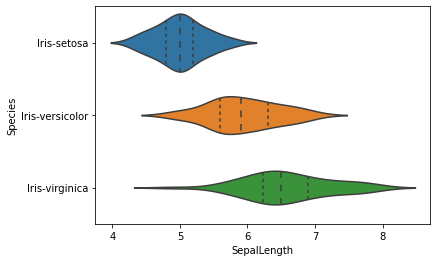

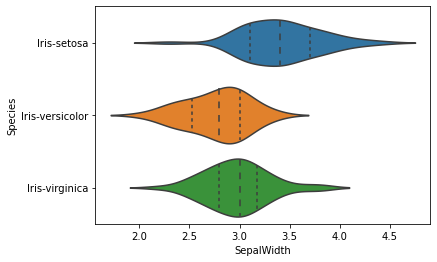

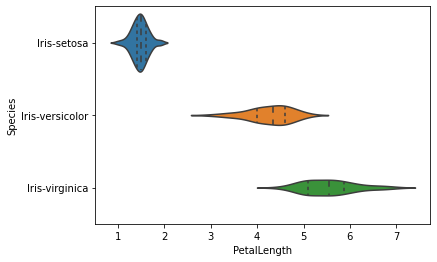

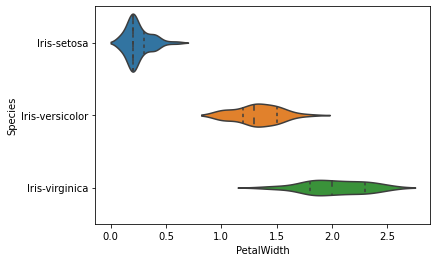

In [19]:
sns.violinplot(y='Species', x='SepalLength', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='SepalWidth', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalLength', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Species', x='PetalWidth', data=df, inner='quartile')
plt.show()

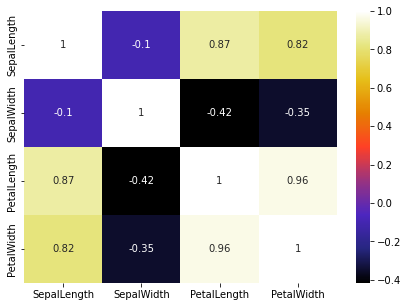

In [22]:
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(), annot=True,cmap='CMRmap')
plt.show()

# Building Model , Training and Testing

In [25]:
from sklearn.model_selection import train_test_split      
X = df.drop(columns=['Species'])
Y = df['Species']
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.2)


In [27]:
dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

# Visualizing the decision tree

[Text(0.3076923076923077, 0.9285714285714286, 'petal width(cm) <= 0.8\ngini = 0.667\nsamples = 119\nvalue = [39, 40, 40]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.7857142857142857, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(0.38461538461538464, 0.7857142857142857, 'petal length(cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]\nclass = Iris-versicolor'),
 Text(0.15384615384615385, 0.6428571428571429, 'petal width(cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(0.07692307692307693, 0.5, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = Iris-versicolor'),
 Text(0.23076923076923078, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(0.6153846153846154, 0.6428571428571429, 'petal width(cm) <= 1.7\ngini = 0.169\nsamples = 43\nvalue = [0, 4, 39]\nclass = Iris-virginica'),
 Text(0.38461538461538464, 0.5, 'petal length(cm) <= 4.95\ngini = 0.49\nsamples = 7\

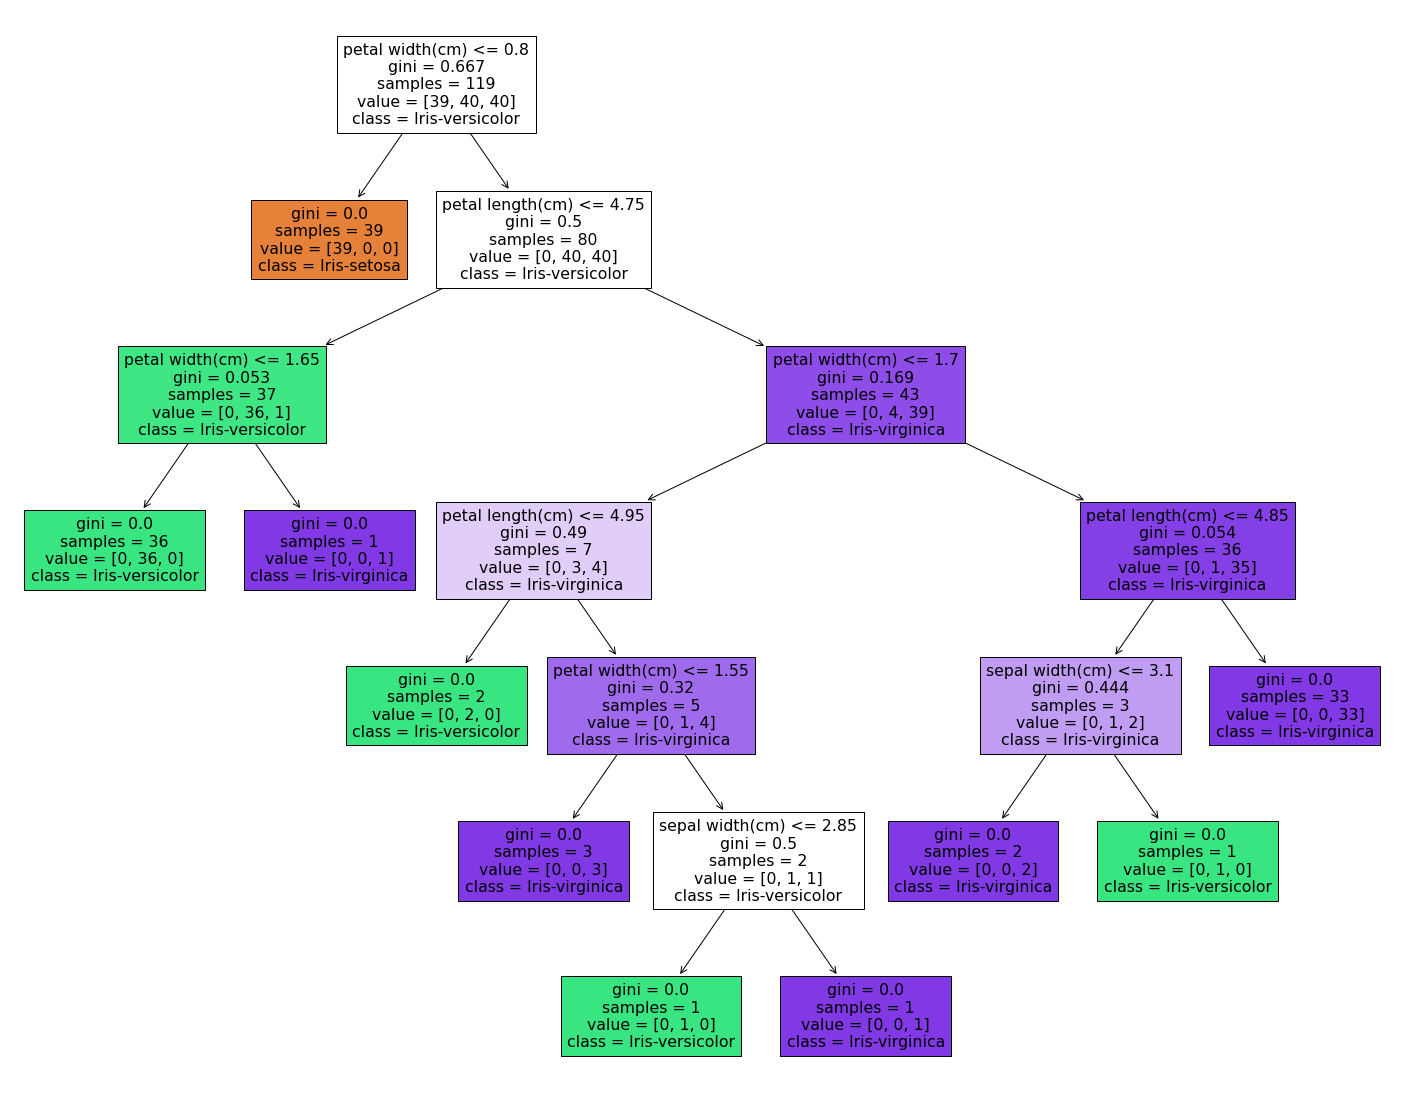

In [31]:
from sklearn import tree
feature_name =  ['sepal length(cm)','sepal width(cm)','petal length(cm)','petal width(cm)']
class_name= df.Species.unique()
plt.figure(figsize=(25,20))
tree.plot_tree(dtree, filled = True, feature_names = feature_name, class_names= class_name)

In [34]:
y_pred = dtree.predict(x_test)
score=accuracy_score(y_test,y_pred)
print("Accuracy:",score)

Accuracy: 0.9666666666666667


In [36]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 6cm, 3.6cm, 1.4cm and 0.4cm respectively

dtree.predict([[6, 3.6, 1.4 , 0.4]])

C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-setosa'], dtype=object)

In [37]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 10cm, 3cm, 5cm and 1cm respectively

dtree.predict([[10, 3, 5, 1]])

C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-virginica'], dtype=object)

In [43]:
#Predict the flower type for a flower with sepal length, sepal width, petal length, petal width as 9cm, 4cm, 2cm and 1.5cm respectively

dtree.predict([[9, 4, 2, 1.5]])

C:\Users\Subhodwip\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)